# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artifacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a sub folder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PA-proj/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PA-proj'

# Section 1

Section 1 content

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

In [7]:
version = 'v1-cherry'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


In [8]:
labels = os.listdir(train_path)
print(f"Project Labels: {labels}" )

Project Labels: ['healthy', 'powdery_mildew']


In [9]:
## Import saved image shape embedding
import joblib
version = 'v1-cherry'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(80, 80, 3)

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




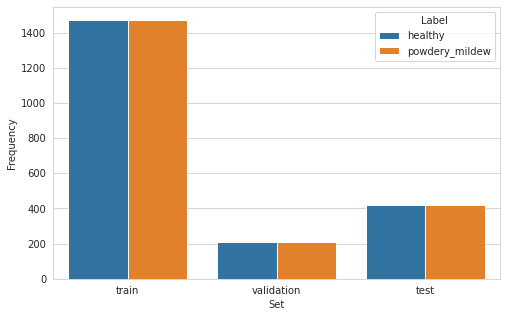

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

In [13]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [16]:
joblib.dump(value=train_set.class_indices , filename=f"{file_path}/class_indices.pkl")

['outputs/v1-cherry/class_indices.pkl']

(20, 80, 80, 3)


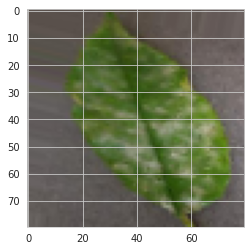

(20, 80, 80, 3)


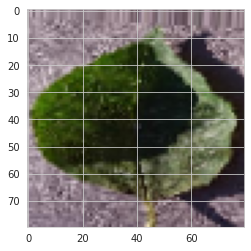

(20, 80, 80, 3)


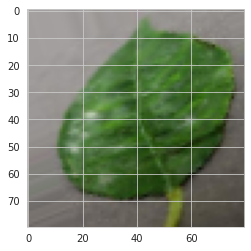

In [18]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

---

# Section 2

Section 2 content

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

---

In [20]:
# sigmoid
def create_tf_model(input_shape):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [21]:
create_tf_model(input_shape=image_shape).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2654336   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2022-06-29 14:19:19.749037: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model = create_tf_model(input_shape=image_shape)
model.fit(train_set,
          epochs=20,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2022-06-29 14:23:13.534219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
147/147 [==============================] - 8s 50ms/step - loss: 0.3408 - accuracy: 0.8314 - val_loss: 0.0643 - val_accuracy: 0.9714
Epoch 2/20
147/147 [==============================] - 7s 49ms/step - loss: 0.0807 - accuracy: 0.9771 - val_loss: 0.0468 - val_accuracy: 0.9857
Epoch 3/20
147/147 [==============================] - 7s 49ms/step - loss: 0.0507 - accuracy: 0.9877 - val_loss: 0.0180 - val_accuracy: 0.9952
Epoch 4/20
147/147 [==============================] - 7s 49ms/step - loss: 0.0364 - accuracy: 0.9901 - val_loss: 0.0524 - val_accuracy: 0.9857
Epoch 5/20
147/147 [==============================] - 7s 49ms/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0049 - val_accuracy: 0.9976
Epoch 6/20
147/147 [==============================] - 7s 48ms/step - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.0034 - val_accuracy: 0.9976
Epoch 7/20
147/147 [==============================] - 7s 49ms/step - loss: 0.0364 - accuracy: 0.9867 - val_loss: 0.0101 - val_accuracy: 0.9976

In [24]:
model.save(f'{file_path}/mildew_detector_model.h5')

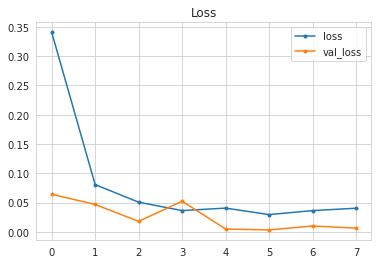

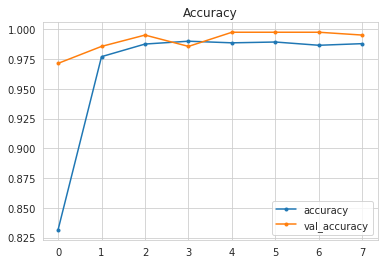

In [25]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

In [26]:
from keras.models import load_model
model = load_model('outputs/v1-cherry/mildew_detector_model.h5')

In [27]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 1s 13ms/step - loss: 0.0024 - accuracy: 1.0000


In [28]:
joblib.dump(value=evaluation , filename=f"outputs/v1-cherry/evaluation.pkl")

['outputs/v1-cherry/evaluation.pkl']

Image shape: (80, 80), Image mode: RGB


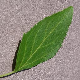

In [32]:
from tensorflow.keras.preprocessing import image

pointer = 417
label = labels[0] # select {'healthy': 0, 'powdery_mildew': 1}

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [33]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0) / 255 # it needs to scale (divide by 255), if you use rescaling in ImageDataGenerator
print(my_image.shape)

(1, 80, 80, 3)


In [34]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999977571771979
healthy


NOTE

* You may add how many sections you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section for "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
